In [1]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\jk977\OneDrive\Desktop\nlp dataset\reviews_520.csv")
df.head()

,review_text,sentiment
0,Very good quality and fast delivery,positive
1,Very good quality and fast delivery,positive
2,"I love this product, it works perfectly",positive
3,"Excellent experience, totally worth the money",positive
4,"Excellent experience, totally worth the money",positive


In [2]:
review = df["review_text"]
review

0                Very good quality and fast delivery
1                Very good quality and fast delivery
2            I love this product, it works perfectly
3      Excellent experience, totally worth the money
4      Excellent experience, totally worth the money
                           ...                      
515                                   Normal product
516                                   Normal product
517                                   Normal product
518                             Neither good nor bad
519        Average quality, acceptable for the price
Name: review_text, Length: 520, dtype: object

In [14]:
from nltk import word_tokenize
import string
from nltk.corpus import stopwords

all_word = []

for i in review:
    word = word_tokenize(i)
    word = [w.lower() for w in word]
    word = [w for w in word if w not in string.punctuation]
    all_word.append(word)

stopword = set(stopwords.words('english'))
removed_stopword = [
    [w for w in sentence if w not in stopword]
    for sentence in all_word
]

from nltk.stem import WordNetLemmatizer

lematizer = WordNetLemmatizer()

lemmatized = [
    [lematizer.lemmatize(w) for w in clean]
    for clean in removed_stopword
]

document = [' '.join(w) for w in lemmatized]

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

vectorizer = CountVectorizer()
tfidf = TfidfVectorizer()

bow = vectorizer.fit_transform(document)
matrix = tfidf.fit_transform(document)

print(vectorizer.get_feature_names_out())
print(bow.toarray())
print("\n")
print(tfidf.get_feature_names_out())
print(matrix.toarray())

['acceptable' 'amazing' 'average' 'bad' 'bought' 'buy' 'damaged'
 'delivery' 'disappointed' 'ever' 'excellent' 'expected' 'experience'
 'fast' 'good' 'highly' 'late' 'love' 'money' 'neither' 'normal' 'nothing'
 'okay' 'perfectly' 'poor' 'price' 'product' 'purchase' 'quality'
 'recommended' 'satisfied' 'service' 'special' 'terrible' 'totally' 'work'
 'worst' 'worth']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]]


['acceptable' 'amazing' 'average' 'bad' 'bought' 'buy' 'damaged'
 'delivery' 'disappointed' 'ever' 'excellent' 'expected' 'experience'
 'fast' 'good' 'highly' 'late' 'love' 'money' 'neither' 'normal' 'nothing'
 'okay' 'perfectly' 'poor' 'price' 'product' 'purchase' 'quality'
 'recommended' 'satisfied' 'service' 'special' 'terrible' 'totally' 'work'
 'worst' 'worth']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.    

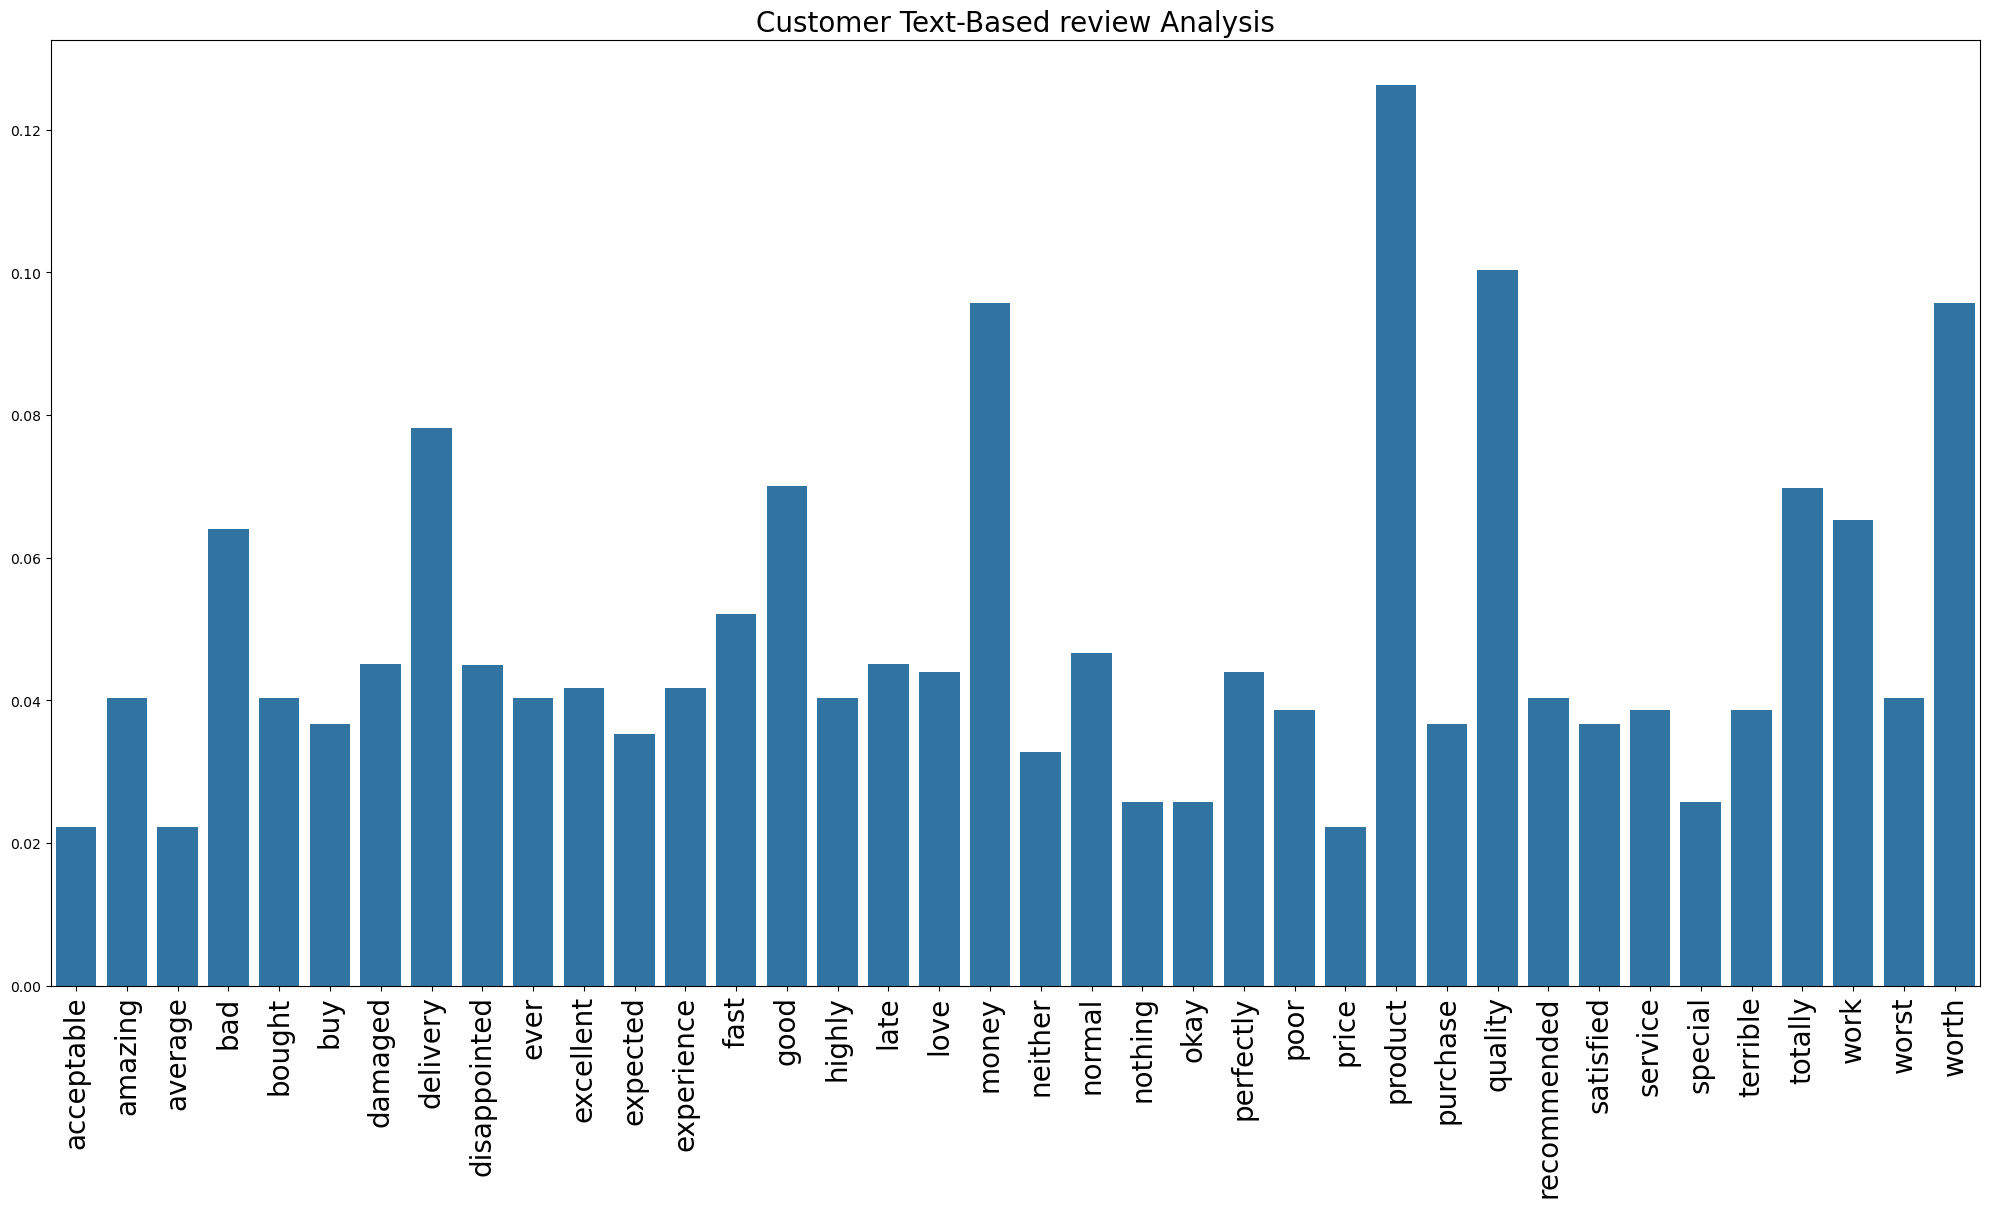

In [28]:
words = tfidf.get_feature_names_out()
score = matrix.toarray().mean(axis = 0)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))

sns.barplot(x = words, y = score)
plt.tight_layout()
plt.title("Customer Text-Based review Analysis", size = 20)
plt.xticks(rotation = 90, size = 20)
plt.show()
